# Sizing & Drawing of I/O Schmitt-Trigger

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

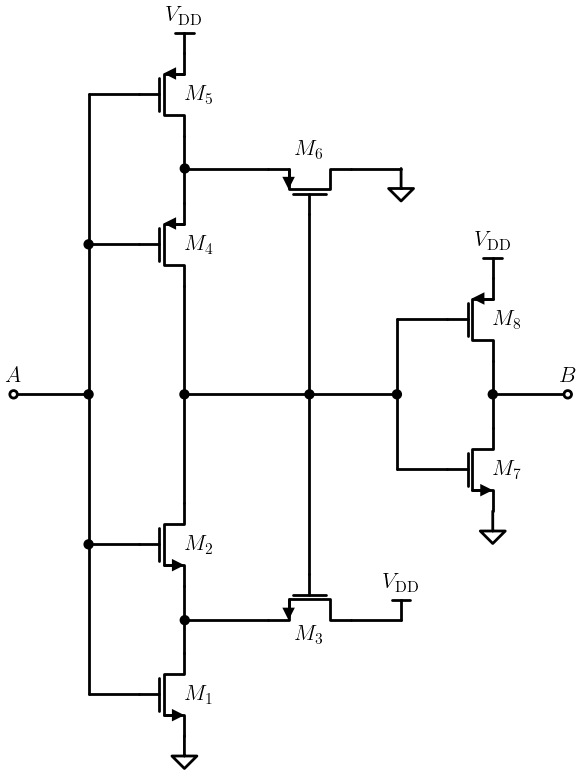

In [18]:
# Draw general Schmitt-Trigger circuit without W/L
# Thick-Oxide Transistors (Inkscape)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Draw Input Lines
    elm.Dot(open=True).label(r'$A$')
    elm.Line().right().length(1.5).dot()
    Adot = d.here
    elm.Line().up().length(3).dot()
    d.push()
    elm.Line().right().length(1)
    M4loc = d.here

    d.pop()
    elm.Line().up().length(3)
    elm.Line().right().length(1)
    M5loc = d.here

    elm.Line().at(Adot).down().length(3).dot()
    d.push()
    elm.Line().right().length(1)
    M2loc = d.here

    d.pop()
    elm.Line().down().length(3)
    elm.Line().right().length(1)
    M1loc = d.here
    # =================================================================

    # Draw M1, M2, M4 and M5
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{1}$', ofst=-1.50).reverse().at(M1loc)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{2}$', ofst=-1.50).reverse().at(M2loc)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{4}$', ofst=-1.50).reverse().at(M4loc)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{5}$', ofst=-1.50).reverse().at(M5loc)
    # =================================================================

    # Connect M1, M2, M4 and M5
    elm.GroundSignal().at(M1.source)
    elm.Line().at(M1.drain).to(M2.source)
    elm.Line().at(M2.drain).toy(Adot).dot()
    d.push()
    elm.Line().to(M4.drain)
    elm.Line().at(M4.source).to(M5.drain)
    elm.Vdd().at(M5.source).label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    # =================================================================

    # Draw M3 and M6
    d.pop()
    elm.Line().right().length(2.5).dot()
    M3M6mid = d.here
    elm.Line().up().length(3.6)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(90).label('$M_{6}$', ofst=-1.5).reverse()
    elm.Line().at(M6.source).left().length(1.66).dot()
    elm.Line().at(M6.drain).right().length(1)
    elm.GroundSignal()

    elm.Line().at(M3M6mid).down().length(3.6)
    M3 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(270).label('$M_{3}$').reverse()
    elm.Line().at(M3.source).left().length(1.66).dot()
    elm.Line().at(M3.drain).right().length(1)
    elm.Vdd().label('$V_\mathrm{DD}$', loc='top', ofst=0.15)
    # =================================================================

    # Output Inverter
    elm.Line().at(M3M6mid).right().length(1.75).dot()
    Tdot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{8}$', ofst=-1.50).reverse()
    elm.Vdd().at(M8.source).label('$V_\mathrm{DD}$', loc='top', ofst=0.15)

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M7 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{7}$', ofst=-1.50).reverse()
    elm.GroundSignal().at(M7.source)

    elm.Line().at(M7.drain).toy(Tdot).dot()
    d.push()
    elm.Line().toy(M8.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot(open=True).label(r'$B$')
    # =================================================================

    # Save the schematic
    d.save('figures/schmitt_trigger/schmitt_trigger_circuit.svg')
    d.save('figures/schmitt_trigger/schmitt_trigger_circuit.pdf')

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.close("all")
# %matplotlib qt
# %matplotlib inline

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 14)

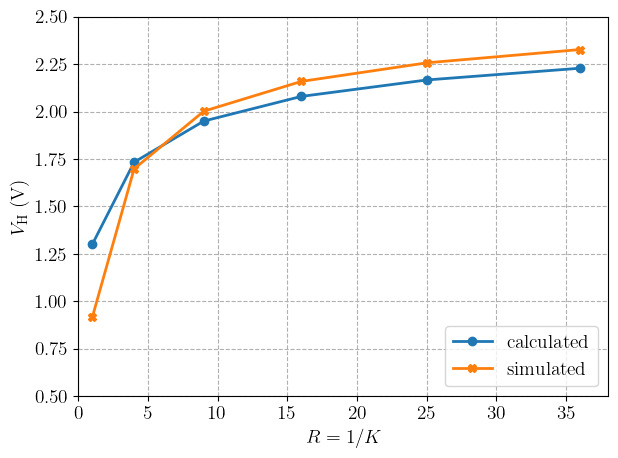

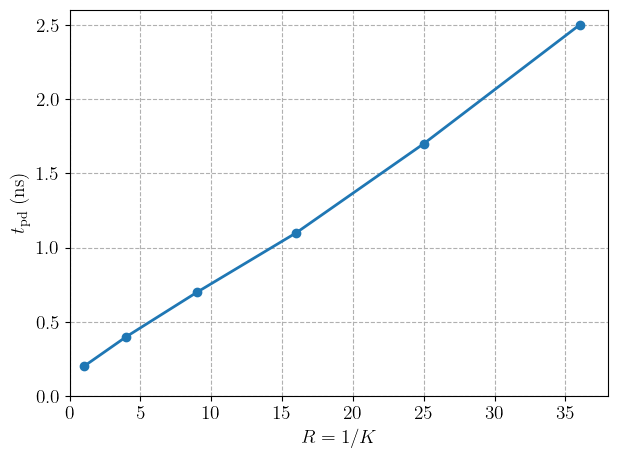

In [ ]:
# Schmitt-Trigger Sizing
# Calculate Hysteresis voltages:
# From the paper "CMOS Schmitt triggers" by B. L. Dokic, we get
# VT+ = (VDD + Vth,p + sqrt(beta_n / beta_p) * Vth,n) / (1 + sqrt(beta_n / beta_p)) + (sqrt(beta_n / beta_p) * (VDD - Vth,n)) / ((1 + sqrt(K_n) * (1 + sqrt(beta_n / beta_p))
# VT- = (VDD + Vth,p + sqrt(beta_n / beta_p) * Vth,n) / (1 + sqrt(beta_n / beta_p)) - (VDD + Vth,p) / ((1 + sqrt(K_p) * (1 + sqrt(beta_n / beta_p))
# VH = 1 / (1 + sqrt(beta_n / beta_p)) * ((sqrt(beta_n / beta_p) (VDD - Vth,n)) / (1 + sqrt(K_n)) + (VDD + Vth,p) / (1 + sqrt(K_p)))

# beta_n = mu_n * Cox * W_n / L_n
# beta_p = mu_p * Cox * W_p / L_p
# Since mu_n ~ 3 mu_p we get two cases.
# 1. case, where W_p = 3*W_n: beta_n = beta_p --> sqrt(beta_n / beta_p) = 1.
# 2. case, where W_p = W_n: beta_n = 1/3 * beta_p --> sqrt(beta_n / beta_p) = sqrt(3).

# K_n = (W_1 / L_1) / (W_3 / L_3) = (W_1 / L_1) / (R * W_1 / L_1) = 1 / R
# K_p = (W_4 / L_4) / (W_6 / L_6) = (W_4 / L_4) / (R * W_4 / L_4) = 1 / R
# K = K_n = K_p, if M3 and M6 are scaled the same with factor R.

# The hysteresis voltage increase, if K = K_n = K_p decreases, hence if R increases.
# This can be realised with an increase of the channel width of M3 and M6.
# To simplify the formulas, we choose sqrt(beta_n / beta_p) = 1 and Vth = Vth,n ~ -Vth,p.
# With this simplification the hysteresis will be symmetric around VDD/2 (common-mode voltage).
# VT+ = VDD/2 + (VDD - Vth,n) / (2 * (1 + sqrt(K)))
# VT- = VDD/2 - (VDD + Vth,p) / (2 * (1 + sqrt(K)))
# VH = (VDD - Vth) / (1 + sqrt(K))

# Set voltages
VDD = 3.3
Vth = 0.7
Vthn = Vth
Vthp = -Vth

# Plot VH(R)
R_vec = np.array([1, 4, 9, 16, 25, 36])
VH_vec_sim = [0.916, 1.698, 2.002, 2.159, 2.257, 2.327]
VH_vec_calc = np.zeros(R_vec.size)
for idx, R in enumerate(R_vec):
  VH_vec_calc[idx] = (VDD - Vth) / (1 + np.sqrt(1/R))

fig1 = plt.figure(num = 1, tight_layout = True)
plt.plot(R_vec, VH_vec_calc, linewidth = 2, marker = "o")
plt.plot(R_vec, VH_vec_sim, linewidth = 2, marker = "X")
plt.xlabel('$R = 1 / K$')
plt.ylabel('$V_\mathrm{H}$ (V)')
# plt.title("$V_\mathrm{H}(R)$ curve")
plt.grid(visible = True, linestyle='--')
plt.legend(['calculated', 'simulated'], loc = "lower right")
plt.xlim((0, 38))
plt.ylim((0.5, 2.5))
plt.show()
fig1.savefig("figures/schmitt_trigger/VH_against_R.svg", bbox_inches='tight')
fig1.savefig("figures/schmitt_trigger/VH_against_R.pdf", bbox_inches='tight')
np.savetxt("figures/schmitt_trigger/VH_against_R.csv", np.column_stack((R_vec, VH_vec_calc, VH_vec_sim)), comments = "", header = "R_vec,VH_vec_calc,VH_vec_sim", delimiter = ",")

# Plot tpd(R)
# If $R$ is increased, the hysteresis will increase.
# However, at the same time, the propagation delay of the Schmitt-Trigger and the area also increases.
# Therefore, one must find a trade-off of these characteristics.
R_vec = [1, 4, 9, 16, 25, 36]
tpd_vec = [0.2, 0.4, 0.7, 1.1, 1.7, 2.5] # ns
fig2 = plt.figure(num = 2, tight_layout = True)
plt.plot(R_vec, tpd_vec, linewidth = 2, marker = "o")
plt.xlabel('$R = 1 / K$')
plt.ylabel('$t_\mathrm{pd}$ (ns)')
# plt.title("$t_\mathrm{pd}(R)$ curve")
plt.grid(visible = True, linestyle='--')
plt.xlim((0, 38))
plt.ylim((0, 2.6))
plt.show()
fig2.savefig("figures/schmitt_trigger/tpd_against_R.svg", bbox_inches='tight')
fig2.savefig("figures/schmitt_trigger/tpd_against_R.pdf", bbox_inches='tight')
np.savetxt("figures/schmitt_trigger/tpd_against_R.csv", np.column_stack((R_vec, tpd_vec)), comments = "", header = "R_vec,tpd_vec", delimiter = ",")

# Set final R
R = 4 # Hysteresis parameter
K = 1/R

# Calculate voltages
VTp = VDD/2 + (VDD - Vthn) / (2 * (1 + np.sqrt(K)))
VTn = VDD/2 - (VDD + Vthp) / (2 * (1 + np.sqrt(K)))
VH = (VDD - Vth) / (1 + np.sqrt(K))

# Xschem subcircuit parameters in um
# HV Transistors
W_P_ST = 3.0
L_P_ST = 0.5
W_N_ST = 1.0
L_N_ST = 0.5

# NMOS
w_1 = W_N_ST
l_1 = L_N_ST
w_2 = W_N_ST
l_2 = L_N_ST
w_3 = R * W_N_ST
l_3 = L_N_ST

# PMOS
w_4 = W_P_ST
l_4 = L_P_ST
w_5 = W_P_ST
l_5 = L_P_ST
w_6 = R * W_P_ST
l_6 = L_P_ST

# Inverter
w_7 = W_N_ST
l_7 = L_N_ST
w_8 = W_P_ST
l_8 = L_P_ST


In [21]:
# print out final design values
print('Schmitt Trigger W/L ratios:')
print('------------------------------------')
print('Hysteresis')
print('NMOS M1: W =', w_1,'um, L =', l_1,'um')
print('NMOS M2: W =', w_2,'um, L =', l_2,'um')
print('NMOS M3: W =', w_3,'um, L =', l_3,'um')
print('PMOS M4: W =', w_4,'um, L =', l_4,'um')
print('PMOS M5: W =', w_5,'um, L =', l_5,'um')
print('PMOS M6: W =', w_6,'um, L =', l_6,'um')
print('R =', R)
print('VT+ =', round(float(VTp), 3),'V')
print('VT- =', round(float(VTn), 3),'V')
print('VH =', round(float(VH), 3),'V')
print('------------------------------------')
print('Inverter x1')
print('NMOS M7: W =', w_7,'um, L =', l_7,'um')
print('PMOS M8: W =', w_8,'um, L =', l_8,'um')
print('------------------------------------')

Schmitt Trigger W/L ratios:
------------------------------------
Hysteresis
NMOS M1: W = 1.0 um, L = 0.5 um
NMOS M2: W = 1.0 um, L = 0.5 um
NMOS M3: W = 4.0 um, L = 0.5 um
PMOS M4: W = 3.0 um, L = 0.5 um
PMOS M5: W = 3.0 um, L = 0.5 um
PMOS M6: W = 12.0 um, L = 0.5 um
R = 4
VT+ = 2.517 V
VT- = 0.783 V
VH = 1.733 V
------------------------------------
Inverter x1
NMOS M7: W = 1.0 um, L = 0.5 um
PMOS M8: W = 3.0 um, L = 0.5 um
------------------------------------


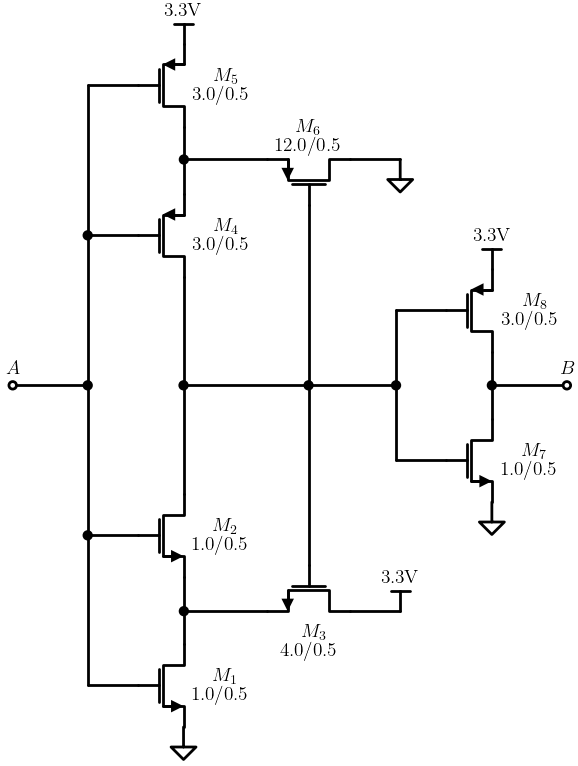

In [22]:
# Draw Schmitt-Trigger circuit with W/L
# Thick-Oxide Transistors (Inkscape)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=14)
    
    # Draw Input Lines
    elm.Dot(open=True).label(r'$A$')
    elm.Line().right().length(1.5).dot()
    Adot = d.here
    elm.Line().up().length(3).dot()
    d.push()
    elm.Line().right().length(1)
    M4loc = d.here

    d.pop()
    elm.Line().up().length(3)
    elm.Line().right().length(1)
    M5loc = d.here

    elm.Line().at(Adot).down().length(3).dot()
    d.push()
    elm.Line().right().length(1)
    M2loc = d.here

    d.pop()
    elm.Line().down().length(3)
    elm.Line().right().length(1)
    M1loc = d.here
    # =================================================================

    # Draw M1, M2, M4 and M5
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_1 \\$'+str(w_1)+'/'+str(l_1), ofst=-2.25).reverse().at(M1loc)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_2 \\$'+str(w_2)+'/'+str(l_2), ofst=-2.25).reverse().at(M2loc)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_4 \\$'+str(w_4)+'/'+str(l_4), ofst=-2.25).reverse().at(M4loc)
    M5 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_5 \\$'+str(w_5)+'/'+str(l_5), ofst=-2.25).reverse().at(M5loc)
    # =================================================================

    # Connect M1, M2, M4 and M5
    elm.GroundSignal().at(M1.source)
    elm.Line().at(M1.drain).to(M2.source)
    elm.Line().at(M2.drain).toy(Adot).dot()
    d.push()
    elm.Line().to(M4.drain)
    elm.Line().at(M4.source).to(M5.drain)
    elm.Vdd().at(M5.source).label(str(3.3)+'V')
    # =================================================================

    # Draw M3 and M6
    d.pop()
    elm.Line().right().length(2.5).dot()
    M3M6mid = d.here
    elm.Line().up().length(3.6)
    M6 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(90).label(r'$M_6 \\$'+str(w_6)+'/'+str(l_6), ofst=-1.75).reverse()
    elm.Line().at(M6.source).left().length(1.66).dot()
    elm.Line().at(M6.drain).right().length(1)
    elm.GroundSignal()

    elm.Line().at(M3M6mid).down().length(3.6)
    M3 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(270).label(r'$M_3 \\$'+str(w_3)+'/'+str(l_3), ofst=0.25).reverse()
    elm.Line().at(M3.source).left().length(1.66).dot()
    elm.Line().at(M3.drain).right().length(1)
    elm.Vdd().label(str(3.3)+'V')
    # =================================================================

    # Output Inverter
    elm.Line().at(M3M6mid).right().length(1.75).dot()
    Tdot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M8 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_8 \\$'+str(w_8)+'/'+str(l_8), ofst=-2.25).reverse()
    elm.Vdd().at(M8.source).label(str(3.3)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M7 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_7 \\$'+str(w_7)+'/'+str(l_7), ofst=-2.25).reverse()
    elm.GroundSignal().at(M7.source)

    elm.Line().at(M7.drain).toy(Tdot).dot()
    d.push()
    elm.Line().toy(M8.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot(open=True).label(r'$B$')
    # =================================================================

    # Save the schematic
    d.save('figures/schmitt_trigger/schmitt_trigger_WL_circuit.svg')
    d.save('figures/schmitt_trigger/schmitt_trigger_WL_circuit.pdf')